In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [158]:
true = np.fromfile('/mnt/others/DATA/Inversion/RNN_TEST2/velocity/Layer.dat', np.float32)
true = np.reshape(true, (128, 256))
init = np.fromfile('/mnt/others/DATA/Inversion/RNN_TEST2/velocity/Linear.dat', np.float32)
init = np.reshape(init, (128, 256))

In [199]:
# cg = np.load('/mnt/others/DATA/Inversion/Testld/inversion/Test/model/model_Hz_010.npy')
d = np.load('/mnt/others/DATA/Inversion/RNN_TEST2/inversion/vel1.00freq_06epoch.npy')
# d2 = np.load('/mnt/others/DATA/Inversion/RNN/inversion/Multiscale_L1loss/vel10.00freq_19epoch.npy')

In [206]:
d

array([[  -13433.936,   184813.48 ,  -149820.81 , ...,    61751.17 ,
          -14686.387,   -32679.5  ],
       [ -333091.84 ,   455132.16 ,  -139638.16 , ...,    46616.473,
           85607.53 ,  -109405.84 ],
       [ -540200.75 ,   327818.53 ,   384967.12 , ...,  -189993.5  ,
          295326.97 ,  -177811.6  ],
       ...,
       [ 1516986.9  , -3384137.2  ,  4328244.5  , ...,   325703.   ,
         -594440.9  ,   663471.6  ],
       [ 1397116.8  , -3659603.2  ,  4566164.5  , ...,   273376.56 ,
         -602722.56 ,   673299.1  ],
       [ 2943593.   , -4647103.   ,  4713700.   , ...,   468906.53 ,
         -752745.1  ,   619656.94 ]], dtype=float32)

In [200]:
d[60:-60,60:-60].tofile('/mnt/others/DATA/Inversion/RNN/velocity/5HZ.dat')

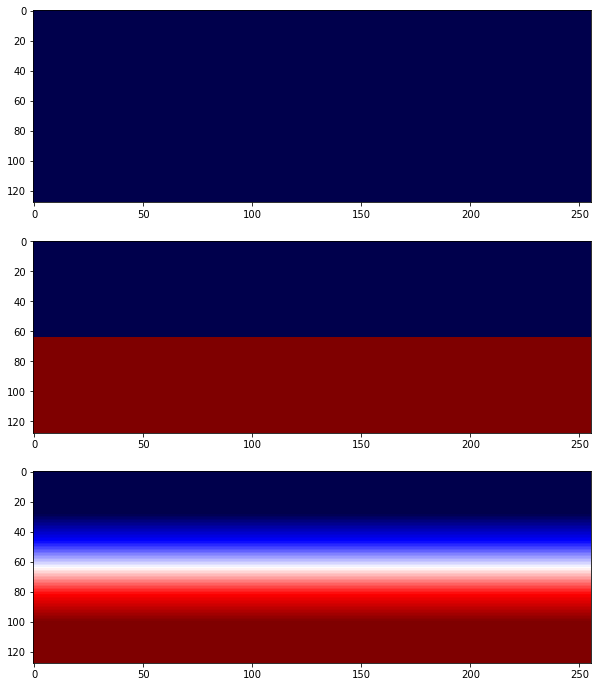

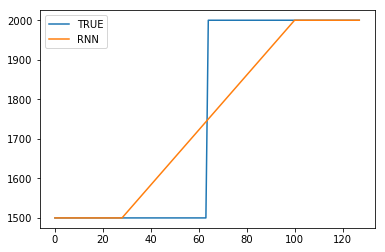

In [204]:
no = 10
fig, axes = plt.subplots(3,1, figsize=(10,12))
axes[0].imshow(d[60:-60,60:-60], vmin=1500,vmax=2000, aspect='auto', cmap=plt.cm.seismic)
axes[1].imshow(true,  vmin=1500,vmax=2000, aspect='auto',cmap=plt.cm.seismic)
axes[2].imshow(init,  vmin=1500,vmax=2000, aspect='auto',cmap=plt.cm.seismic)
plt.show()

trace = 64
plt.plot(true[:,trace])
# plt.plot(d[60:-60,60:-60][:,trace])
plt.plot(init[:,trace])
# plt.plot(d2[60:-60,60:-60][:,trace])
plt.legend(['TRUE', 'RNN', 'RNN-Sample'])
plt.show()

In [143]:
# no = 10
# vmin,vmax=np.percentile(d[no].squeeze(), [2, 98])
# plt.imshow(d[no].squeeze(), vmin=vmin,vmax=vmax, aspect='auto', cmap=plt.cm.gray)
# plt.show()

In [132]:
linear = np.average(true, 1)
linear = np.expand_dims(linear, 1)
linear = np.tile(linear, 561)
linear.tofile('/mnt/others/DATA/Inversion/RNN/velocity/LINEAR.dat')

In [157]:
# plt.imshow(linear)

In [181]:
data = np.load('/mnt/others/DATA/Inversion/RNN_TEST2/data/obs.npy')
data_f = cpu_fft(data.copy(), 0.001, N=1, low=3.0, axis = 1, mode='lowpass')
daat2 = np.load('/mnt/others/DATA/Inversion/RNN_TEST2/data/obs_inv5HZ.npy')
data_f2 = cpu_fft(daat2.copy(), 0.001, N=1, low=3.0, axis = 1, mode='lowpass')


In [179]:
daat2.max(), daat2.min()

(3.6042957, -1.94028)

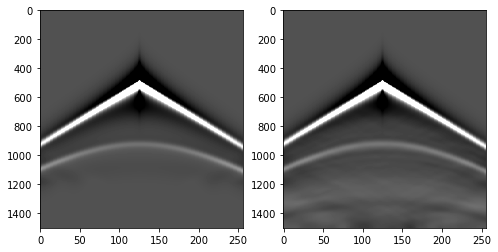

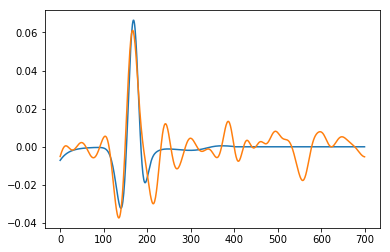

In [182]:
no  = 5
fig,axes = plt.subplots(1,2,figsize=(8,4))
vmin,vmax=np.percentile(data_f[no], [2, 98])
axes[0].imshow(data_f[no].squeeze(), vmin=vmin,vmax=vmax, aspect='auto', cmap=plt.cm.gray)
axes[1].imshow(data_f2[no].squeeze(), vmin=vmin,vmax=vmax, aspect='auto', cmap=plt.cm.gray)
plt.show()
plt.plot(data[no].squeeze()[800::,64])
plt.plot(daat2[no].squeeze()[800::,64])
plt.show()


In [147]:
173*20

3460

In [126]:
def cpu_fft(d, dt, N = 5, low = 5, if_plot = True, axis = -1, mode = 'lowpass'):
    from scipy import signal
    """
        implementation of fft.
    """
    wn = 2*low/(1/dt)
    b, a = signal.butter(N, wn, mode)
    d_filter = signal.filtfilt(b, a, d, axis = axis)
    return d_filter.astype(np.float32)
# full_band_data = np.load('/mnt/others/DATA/Inversion/RNN/data/obs.npy')

In [220]:
filtered_data = cpu_fft(full_band_data.copy(), 0.001, N=1, low=5.0, axis = 1, mode='lowpass')

/home/wangsw/software/Anaconda/lib/python3.7/site-packages/scipy/signal/_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]


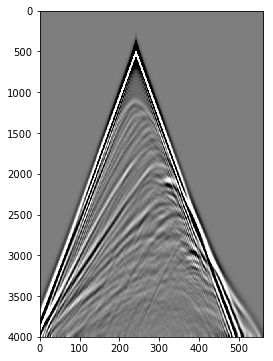

In [222]:
no  = 12
plt.figure(figsize=(4,6))
vmin,vmax=np.percentile(filtered_data[no], [2, 98])
plt.imshow(filtered_data[no].squeeze(), vmin=vmin,vmax=vmax, aspect='auto', cmap=plt.cm.gray)
plt.show()

# Loss

In [12]:
loss0 = np.load('/mnt/others/DATA/Inversion/RNN/inversion/Multiscale/loss.npy')
loss1 = np.load('/mnt/others/DATA/Inversion/RNN/inversion/Multiscale1/loss.npy')

In [38]:
loss1.shape

(3, 20, 560)

In [43]:
np.where(loss1[0][0]!=0)[0].shape

(20,)

In [15]:
loss0.shape

(3, 20, 25)

In [156]:
# plt.plot(np.sum(loss0, 2)[0], 'red')
# plt.plot(np.sum(loss1, 2)[0], 'black')
# plt.legend(['10 shot', 'Sample shot'])
# plt.show()
# plt.plot(np.sum(loss0, 2)[1], 'red')
# plt.plot(np.sum(loss1, 2)[1], 'black')
# plt.legend(['10 shot', 'Sample shot'])
# plt.show()
# plt.plot(np.sum(loss0, 2)[2], 'red')
# plt.plot(np.sum(loss1, 2)[2], 'black')
# plt.legend(['10 shot', 'Sample shot'])
# plt.show()

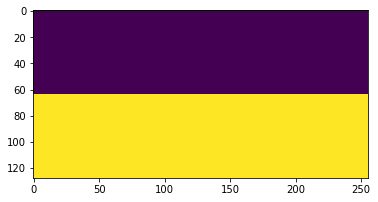

In [3]:
layer = np.ones((128, 256), np.float32)*2000
layer[0:64] = 1500
layer.tofile('/mnt/others/DATA/Inversion/RNN_TEST2/velocity/Layer.dat')
plt.imshow(layer)
plt.show()
layer = np.ones((128, 256), np.float32)*1500
layer.tofile('/mnt/others/DATA/Inversion/RNN_TEST2/velocity/BACKGROUND.dat')

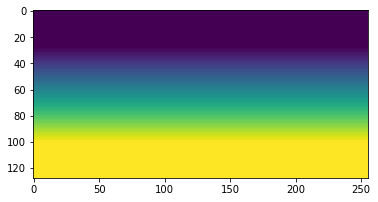

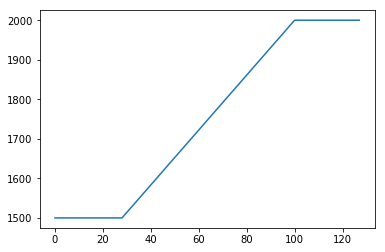

In [151]:
linear = np.ones((128, 256), np.float32)*2000
linear[0:64] = 1500

for i in range(28, 100):
    linear[i,:] = 1500+(2000-1500)/(100-28)*(i-28)
    
plt.imshow(linear)
plt.show()
plt.plot(linear[:,64])
plt.show()

linear.tofile('/mnt/others/DATA/Inversion/RNN_TEST2/velocity/Linear.dat')